In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/outlier/이재명.csv")
data.head()


,tweet,date,retweets_count,link
0,윤석열 vs 이재명 인성 논란 이 영상 하나로 종결 짓습니다 심각한 언론 형평성 4...,2021-11-22,0,https://twitter.com/SungJun_777/status/1462764...
1,jtkim1013 좌파들아 이재명을 구속해 그래야 윤돌이도 구속하지,2021-11-22,0,https://twitter.com/sosara609/status/146276435...
2,지도부 빼고 취준생 앉히고 이재명 부동산 대장동 반성 사과 B98BA8fnHt,2021-11-22,0,https://twitter.com/love2poem/status/146276434...
3,TheMinjoo_Kr 국힘당 보다 수준 떨어지는 만주당 상태 북한까지 이재명의 ...,2021-11-22,0,https://twitter.com/lanotte702/status/14627642...
4,진성준 아주 무례하고 개매너인 거 이재명을 위해 온 몸을 바쳐 막아가며 소리지르고 ...,2021-11-22,1,https://twitter.com/digidigi0208/status/146276...


In [ ]:
range(len(data["tweet"]))

range(0, 59880)

# 정수 인코딩과 단어 집합 만들기

In [ ]:
!pip install konlpy
from konlpy.tag import Kkma  
kkma = Kkma()
tokenized_doc=[]
for n in range(len(data["tweet"])):
    text = data["tweet"][n]
    tokenized_doc.append(list(kkma.nouns(str(text))))
print(tokenized_doc[:5])

In [ ]:
print(tokenized_doc[2])

['지도부', '취', '생', '이재명', '부동산', '대장', '대장동', '동', '반성', '사과', '98', '8']


In [ ]:
kkma.nouns(data["tweet"][2])

['지도부', '취', '생', '이재명', '부동산', '대장', '대장동', '동', '반성', '사과', '98', '8']

이제 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록. 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 세번째 댓글을 추출합니다.

In [ ]:
from gensim import corpora
dictionary = corpra.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[2])#세번째 댓글 출력

[(9, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
tokenized_doc[2]

['지도부', '취', '생', '이재명', '부동산', '대장', '대장동', '동', '반성', '사과', '98', '8']

In [ ]:
print(corpus[2])#30개의 댓글 출력

[(9, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


총 학습된 단어의 개수를 확인

In [ ]:
len(dictionary) #61145개 단어가 학습

61145

# 조사포함일경우 정수 인코딩 해석

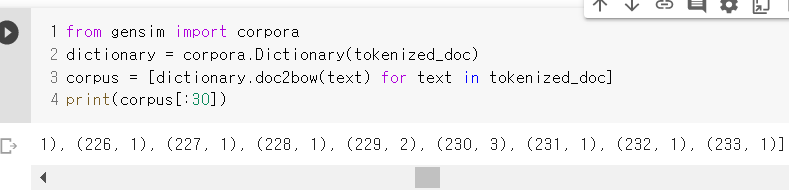

위의 출력 결과 중에서 (229, 2)는 정수 인코딩이 229으로 할당된 단어가 두 번 (230, 3)는 정수 인코딩이 230으로 할당된 단어가 세번 등장하였음을 의미합니다. 229와 230이라는 값을 가지는 단어가 정수 인코딩이 되기 전에는 어떤 단어였는지 확인하여봅시다. 이는 dictionary[]에 기존 단어가 무엇인지 알고자하는 정수값을 입력하여 확인할 수 있습니다.

In [ ]:
print(dictionary[229],",",dictionary[230],",",dictionary[234],",",dictionary[310])

파시즘 , 형 , 선대 , 추대


#  LDA 모델을 훈련

각 단어 앞에 붙은 수치는 단어의 해당 토픽에 대한 기여도를 보여줍니다. 또한 맨 앞에 있는 토픽 번호는 0부터 시작하므로 총 20개의 토픽은 0부터 19까지의 번호가 할당되어져 있습니다. passes는 알고리즘의 동작 횟수를 말하는데, 알고리즘이 결정하는 토픽의 값이 적절히 수렴할 수 있도록 충분히 적당한 횟수를 정해주면 됩니다. 여기서는 총 15회를 수행하였습니다. 여기서는 num_words=4로 총 4개의 단어만 출력하도록 하였습니다. 만약 10개의 단어를 출력하고 싶다면 아래의 코드를 수행하면 됩니다.

### 토픽번호별 키워드중요도

In [ ]:
import gensim
NUM_TOPICS = 20 #20개의 토픽(카테고리), k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.049*"이재명" + 0.043*"후보" + 0.042*"교체" + 0.040*"낙"')
(1, '0.050*"이재명" + 0.050*"김" + 0.035*"경" + 0.032*"혜"')
(2, '0.030*"이재명" + 0.025*"도" + 0.024*"경기" + 0.019*"김"')
(3, '0.075*"이재명" + 0.020*"사람" + 0.017*"4" + 0.015*"거"')
(4, '0.035*"이재명" + 0.027*"기" + 0.026*"레" + 0.019*"기레"')
(5, '0.074*"이재명" + 0.028*"거" + 0.025*"민주당" + 0.022*"국"')
(6, '0.024*"비하" + 0.021*"지역" + 0.016*"부선" + 0.015*"버스"')
(7, '0.046*"이재명" + 0.029*"윤" + 0.013*"정" + 0.012*"기본"')
(8, '0.077*"이재명" + 0.077*"윤" + 0.051*"열" + 0.030*"출처"')
(9, '0.042*"부산" + 0.031*"이재명" + 0.012*"비" + 0.011*"부부"')
(10, '0.032*"이재명" + 0.015*"원" + 0.011*"팀" + 0.011*"다리"')
(11, '0.070*"동" + 0.068*"대장" + 0.059*"대장동" + 0.041*"이재명"')
(12, '0.056*"이재명" + 0.029*"우리" + 0.018*"후보" + 0.017*"언론"')
(13, '0.098*"뉴스" + 0.084*"다음" + 0.079*"이재명" + 0.029*"다음뉴스"')
(14, '0.028*"이재명" + 0.022*"일" + 0.022*"년" + 0.019*"공개"')
(15, '0.026*"이재" + 0.023*"민주당" + 0.018*"이재명" + 0.017*"명의"')
(16, '0.025*"화천" + 0.025*"대유" + 0.024*"화천대유" + 0.023*"이재명"')
(17, '0.047*"이재명" + 0.0

In [ ]:
print(ldamodel.print_topics())

[(0, '0.049*"이재명" + 0.043*"후보" + 0.042*"교체" + 0.040*"낙" + 0.038*"문" + 0.030*"안" + 0.029*"절대" + 0.029*"연" + 0.028*"재인" + 0.026*"후보교체"'), (1, '0.050*"이재명" + 0.050*"김" + 0.035*"경" + 0.032*"혜" + 0.031*"김혜경" + 0.023*"부인" + 0.015*"씨" + 0.014*"사고" + 0.011*"측" + 0.010*"방문"'), (2, '0.030*"이재명" + 0.025*"도" + 0.024*"경기" + 0.019*"김" + 0.015*"경기도" + 0.015*"부" + 0.014*"32" + 0.013*"문프" + 0.011*"지사" + 0.010*"기현"'), (3, '0.075*"이재명" + 0.020*"사람" + 0.017*"4" + 0.015*"거" + 0.013*"이해" + 0.013*"전과" + 0.013*"말" + 0.012*"범" + 0.012*"민주당" + 0.010*"길"'), (4, '0.035*"이재명" + 0.027*"기" + 0.026*"레" + 0.019*"기레" + 0.016*"후보" + 0.015*"대결" + 0.014*"대" + 0.011*"20" + 0.010*"국민" + 0.010*"청년"'), (5, '0.074*"이재명" + 0.028*"거" + 0.025*"민주당" + 0.022*"국" + 0.022*"당" + 0.014*"힘" + 0.012*"새끼" + 0.012*"말" + 0.011*"지지자" + 0.011*"뭐"'), (6, '0.024*"비하" + 0.021*"지역" + 0.016*"부선" + 0.015*"버스" + 0.015*"이재명" + 0.014*"김부선" + 0.013*"보도" + 0.012*"48" + 0.012*"강" + 0.011*"폭행"'), (7, '0.046*"이재명" + 0.029*"윤" + 0.013*"정" + 0.012*"기본" + 0.0

In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

# 문서 관점에서 topic과 document 알기(문서별 토픽 분포 보기)

토픽별 단어 분포는 위에서 확인하였음. 문서별 토픽 분포에 대해 확인을 위해 이미 훈련된 LDA모델인 ldamodel[]에 전체 데이터가 정수 인코딩 된 결과를 넣은 후 확인 가능. 

상위 5개의 문서에 대해서만 토픽분포 확인

In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(3, 0.10067499), (8, 0.36198106), (12, 0.3758611), (16, 0.10814951)]
1 번째 문서의 topic 비율은 [(5, 0.16109002), (8, 0.16285586), (10, 0.32503107), (11, 0.25102302)]
2 번째 문서의 topic 비율은 [(4, 0.28680065), (9, 0.08651399), (11, 0.34693724), (16, 0.13835253), (19, 0.083703294)]
3 번째 문서의 topic 비율은 [(3, 0.50656104), (5, 0.26801687), (15, 0.18292204)]
4 번째 문서의 topic 비율은 [(2, 0.053431995), (3, 0.13731985), (5, 0.2531121), (11, 0.2634677), (12, 0.11122707), (13, 0.1464413)]


위의 출력 결과에서 (숫자, 확률)은 토픽 번호와 해당토픽이 해당문서에서 차지하는 분포도를 의미.예를 들어 2번째 문서의 토픽 비율에서 (5, 0.16109002)은 5번 토픽이 16%의 분포도를 가지는 것을 의미

좀 더 깔끔한 형태의 데이터프레임 형식으로 출력

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,12.0,0.3758,"[(3, 0.10069134), (8, 0.36196253), (12, 0.3758..."
1,1,10.0,0.3250,"[(5, 0.16107611), (8, 0.16304217), (10, 0.3249..."
2,2,11.0,0.3469,"[(4, 0.28677323), (9, 0.08651415), (11, 0.3469..."
3,3,3.0,0.5065,"[(3, 0.50653416), (5, 0.26805422), (15, 0.1829..."
4,4,11.0,0.2635,"[(2, 0.053432025), (3, 0.13721284), (5, 0.2532..."
5,5,8.0,0.2930,"[(0, 0.07040357), (8, 0.2930087), (9, 0.124073..."
6,6,10.0,0.3500,"[(0, 0.016666668), (1, 0.016666668), (2, 0.016..."
7,7,5.0,0.8100,"[(5, 0.81000006)]"
8,8,13.0,0.9208,"[(13, 0.92083335)]"
9,9,19.0,0.6057,"[(18, 0.28183764), (19, 0.6056624)]"


# 단어 관점에서topic과 documents를 알기


In [ ]:
# 대장동에 관련된 토픽을 찾기. id:23(<--대장,대장동(id=24))
term23_topic_dist = ldamodel.get_term_topics(23, minimum_probability=0)
sorted_term_topic = sorted(term23_topic_dist, key=lambda x:x[1], reverse=True)
sorted_term_topic

[(11, 0.06995057)]

In [ ]:
term24_topic_dist = ldamodel.get_term_topics(24, minimum_probability=0)
sorted_term_topic = sorted(term24_topic_dist, key=lambda x:x[1], reverse=True)
sorted_term_topic

[(17, 0.00061622955),
 (3, 0.00040493277),
 (13, 0.0003138429),
 (11, 0.00024201533),
 (4, 0.00015066305),
 (7, 0.00014460011)]

In [ ]:
topics[11]

(11, '0.070*"동" + 0.068*"대장" + 0.059*"대장동" + 0.041*"이재명"')

In [ ]:
topics[17]

(17, '0.047*"이재명" + 0.031*"위" + 0.020*"선대" + 0.019*"민주당"')

대장동과 관련된 토픽은 11번 토픽과 관련이 높음

위의 단어별 토픽 기여도를 보았을때 이슬람과 관련이 깊은 0번째 토픽은 '난민','반대','절대'와 관련이 높고 이들은 이슬람이라는 단어와 연관성이 높은 것을 알수 있습니다.